## Data Analysis Plan



1- Import all nedeed libraries

2- Load your dataset

3- Explore your data

4- Task 1: Preprocessing, Cleaning 

5- Task 2: Classifier and Quality Measure Selection

6- Task 3: Parameter Tuning and Validation

7- Task 4: Model Training

8- Task 5: Model interpretation and feature importance

9- Task 6: External Testing Code

> ## 1- Import Nedded Libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

> ## 2- Load your dataset

In [ ]:
## Read the dataset as pandas dataframe
traindata_df =pd.read_csv('trainingdata.csv')

In [ ]:
## check the head rows of your dataframe
traindata_df.head(3)

,Unnamed: 0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_4991,gene_4992,gene_4993,gene_4994,gene_4995,gene_4996,gene_4997,gene_4998,gene_4999,gene_5000
0,training_sample_1,NaN,9.925867,NaN,12.435052,13.139116,NaN,12.489272,12.250712,NaN,...,19.526312,536.803733,3.248414,896.454308,0.698281,21.489647,13.671497,0.201634,9.321085,14.926754
1,training_sample_2,NaN,9.884897,NaN,7.256017,11.139180,8.676973,20.061645,20.269381,11.017372,...,3.750260,533.326221,0.000000,884.224032,0.687570,8.115166,10.320280,0.201912,0.000000,2.428608
2,training_sample_3,NaN,10.248710,NaN,0.000000,12.029570,8.475879,19.521164,16.750186,8.054995,...,17.357102,543.495109,15.645198,889.211122,0.700385,2.638347,12.721622,0.197425,14.197878,25.394671


In [ ]:
## find out the column names of your dataframe
traindata_df.columns

Index(['Unnamed: 0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5',
       'gene_6', 'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_4991', 'gene_4992', 'gene_4993', 'gene_4994', 'gene_4995',
       'gene_4996', 'gene_4997', 'gene_4998', 'gene_4999', 'gene_5000'],
      dtype='object', length=5001)

In [ ]:
## Make the first column as the index column:

traindata_df = pd.read_csv('trainingdata.csv', index_col='Unnamed: 0')

In [ ]:
## check that the first column is now the index column
traindata_df.head(3)

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_4991,gene_4992,gene_4993,gene_4994,gene_4995,gene_4996,gene_4997,gene_4998,gene_4999,gene_5000
training_sample_1,NaN,9.925867,NaN,12.435052,13.139116,NaN,12.489272,12.250712,NaN,1.738876,...,19.526312,536.803733,3.248414,896.454308,0.698281,21.489647,13.671497,0.201634,9.321085,14.926754
training_sample_2,NaN,9.884897,NaN,7.256017,11.139180,8.676973,20.061645,20.269381,11.017372,7.010246,...,3.750260,533.326221,0.000000,884.224032,0.687570,8.115166,10.320280,0.201912,0.000000,2.428608
training_sample_3,NaN,10.248710,NaN,0.000000,12.029570,8.475879,19.521164,16.750186,8.054995,6.631375,...,17.357102,543.495109,15.645198,889.211122,0.700385,2.638347,12.721622,0.197425,14.197878,25.394671


In [ ]:
## Check the last set of rows in your dataframe
traindata_df.tail()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_4991,gene_4992,gene_4993,gene_4994,gene_4995,gene_4996,gene_4997,gene_4998,gene_4999,gene_5000
training_sample_596,NaN,8.861974,NaN,9.397273,11.564793,8.820728,11.674931,9.406866,9.985671,2.834931,...,13.336770,540.863533,8.344888,906.672717,0.702944,15.237007,6.844675,0.202377,0.000000,13.774639
training_sample_597,NaN,10.994000,8.325467,12.342499,11.343963,9.807519,16.124035,17.220336,11.278072,2.267525,...,26.746630,541.228875,8.448715,905.461547,0.698434,23.170266,2.187069,0.199818,14.804905,13.084605
training_sample_598,NaN,10.514024,NaN,19.127077,11.320671,9.253337,16.879628,16.737419,9.478937,9.561510,...,10.666572,536.376705,3.930514,906.396194,0.695393,16.370510,0.000000,0.202296,2.672799,13.629431
training_sample_599,NaN,10.079445,7.556759,0.000000,NaN,9.587972,27.479704,18.452056,8.817224,4.766034,...,23.347500,545.280070,8.529575,896.256760,0.709460,11.336570,11.421827,0.201581,0.000000,11.019497
training_sample_600,1.895147,9.069979,7.590467,7.089150,12.812528,9.524630,19.807916,21.136285,8.784308,1.123519,...,6.486079,533.444194,7.405746,885.680891,0.710359,12.397815,0.000000,0.198190,14.589504,10.974162


In [ ]:
## Read the labels dataset as pandas dataframe:

target_df = pd.read_csv('traininglabels.csv')
#target_df.head(3)

In [ ]:
## Read the labels dataset & Make the first column as the index column:

target_df = pd.read_csv('traininglabels.csv',index_col='Unnamed: 0')
target_df.columns= ['class']
#target_df

In [ ]:
## Examine if there is null values in the target dataset:
target_df.isnull().sum()

class    0
dtype: int64

In [ ]:
## Find how many classes exist in the target dataset:
target_df['class'].unique()

array([0, 1])

In [ ]:
## check how many rows & columns in your dataframes

print(target_df.shape)
print(traindata_df.shape)

(600, 1)
(600, 5000)


> ## 3- Exploring your data

In [ ]:
traindata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, training_sample_1 to training_sample_600
Columns: 5000 entries, gene_1 to gene_5000
dtypes: float64(4927), int64(73)
memory usage: 22.9+ MB


In [ ]:
traindata_df.describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_4991,gene_4992,gene_4993,gene_4994,gene_4995,gene_4996,gene_4997,gene_4998,gene_4999,gene_5000
count,65.000000,600.000000,355.000000,600.000000,549.000000,535.000000,600.000000,600.000000,479.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.152797,10.189279,7.573543,9.721694,11.894184,9.165010,16.454019,15.517376,10.091952,4.970728,...,10.677761,535.746773,10.456841,892.414584,0.700338,13.850775,5.344296,0.199906,7.365950,10.802939
std,1.706884,1.230677,0.447046,5.292511,0.637183,0.547469,5.169813,5.067225,1.102212,4.203977,...,8.595839,5.635481,8.507882,8.727742,0.006962,4.898953,4.472732,0.001965,5.267644,9.050029
min,0.464355,7.872404,5.681137,0.000000,9.978353,6.059995,0.729162,1.190847,6.515872,0.000000,...,0.000000,517.617091,0.000000,870.190864,0.680851,0.000000,0.000000,0.194707,0.000000,0.000000
25%,2.040472,9.251098,7.288121,5.945803,11.444171,8.820331,12.719576,12.018328,9.409285,1.358236,...,3.470397,532.088173,2.761687,886.332338,0.695900,10.310382,1.234284,0.198563,3.129964,2.839298
50%,2.888052,9.925828,7.577429,9.911280,11.841879,9.103883,16.269931,15.398189,10.206660,4.436556,...,9.817944,535.804927,9.548563,892.188333,0.700002,13.843898,4.914802,0.199918,6.813815,9.657708
75%,3.933686,10.805914,7.861607,13.343368,12.333393,9.490411,19.755172,18.801191,10.847829,7.666387,...,16.025598,539.373662,16.693742,898.484287,0.704558,17.104707,8.293804,0.201168,11.052261,17.116483
max,9.791109,14.226224,8.966289,23.297873,13.594744,12.123206,33.373274,31.124723,13.421329,21.130483,...,36.553480,552.093988,35.351412,921.123495,0.724075,29.662142,19.769599,0.205377,23.512562,38.873169


> ## 4- Task 1: Preprocessing, Cleaning 



#### 1- Check for all null columns & remove if any exists.
#### 2- Check for all null rows & remove if any exists.
#### 3- Check for existance of duplicate rows & remove if any exists.
#### 4- Check for existance of duplicate columns & remove if any exists.
#### 5- Check for existance of negative values.
#### 6- Check for the existance of all zeros columns & remove if any exists.
#### 7- Check for columns having nulls >= 25% of its elements & remove if any exists.
#### 8- Split df with respect to class and check for <u> all nan </U> or <u> all zeros</u> in each class separately.
#### 9- Drop fraction genes.
#### 10- Handling outliers. 
#### 11- Data Imputation (replace missing values).
#### 12- Check correlation between columns and remove highly correlated columns. 
#### 13-Dimensionality reduction.
#### 14- Feature scaling.

> ## Preprocessing steps: 
> #### 1- Check for all null columns & remove if any exists

In [ ]:
## Calculate total number of columns that had null values 
Null_columns =[]
for col in traindata_df.columns:
    n = traindata_df[col].isnull().any()
    if n == True:
        Null_columns.append(col)
print (len(Null_columns))        

500


In [ ]:
## Find if there were genes (columns) having all it's elements as null values, and counting them:

AllNull_genes = []
for column in traindata_df.columns:
    All_null = traindata_df[column].isnull().sum()
    if All_null == 600:         ## This means that this gene has 600 null entries corresponding to the 600 samples
        #print (column)
        AllNull_genes.append(column)
print(AllNull_genes)        
print (len(AllNull_genes))
        

['gene_211', 'gene_251', 'gene_481', 'gene_544', 'gene_635', 'gene_811', 'gene_1027', 'gene_1113', 'gene_1173', 'gene_1430', 'gene_1646', 'gene_1662', 'gene_1690', 'gene_1691', 'gene_1700', 'gene_1740', 'gene_1887', 'gene_1937', 'gene_1939', 'gene_1965', 'gene_2168', 'gene_2207', 'gene_2246', 'gene_2272', 'gene_2374', 'gene_2400', 'gene_2835', 'gene_2999', 'gene_3080', 'gene_3164', 'gene_3376', 'gene_3399', 'gene_3495', 'gene_3654', 'gene_3829', 'gene_3925', 'gene_4009', 'gene_4054', 'gene_4123', 'gene_4127', 'gene_4139', 'gene_4338', 'gene_4351', 'gene_4528', 'gene_4534', 'gene_4641', 'gene_4659', 'gene_4801', 'gene_4805', 'gene_4868']
50


In [ ]:
## Drop genes (columns) with all null (missing) elements
No_AllNulls_df = traindata_df.dropna(axis=1, how='all')

### >>> 50 columns were found having all their elements as 'Nan' and were removed

In [ ]:
No_AllNulls_df.shape

(600, 4950)

> ## Preprocessing steps: 
> #### 2- Check for all null rows & remove if any exists

In [ ]:
# find out the number of null values in each row

No_AllNulls_df.isnull().sum(axis=1)

training_sample_1      227
training_sample_2      218
training_sample_3      230
training_sample_4      229
training_sample_5      227
                      ... 
training_sample_596    208
training_sample_597    240
training_sample_598    246
training_sample_599    225
training_sample_600    221
Length: 600, dtype: int64

In [ ]:
## Find if there were samples (rows) having all it's elements as null values and counting them:


Samples = dict(No_AllNulls_df.isnull().sum(axis=1))
Null_samples = []
for key, value in Samples.items():
    #print(key)
    if value == 4950:
        Null_samples.append(key)
print(Null_samples)
print(len(Null_samples))

[]
0


### >>>No rows having all its values as null

> ## Preprocessing steps: 
> #### 3- Check for existance of duplicate rows & remove if any exists

In [ ]:
## To check if there is any duplicate row:

No_AllNulls_df.drop_duplicates()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_4991,gene_4992,gene_4993,gene_4994,gene_4995,gene_4996,gene_4997,gene_4998,gene_4999,gene_5000
training_sample_1,NaN,9.925867,NaN,12.435052,13.139116,NaN,12.489272,12.250712,NaN,1.738876,...,19.526312,536.803733,3.248414,896.454308,0.698281,21.489647,13.671497,0.201634,9.321085,14.926754
training_sample_2,NaN,9.884897,NaN,7.256017,11.139180,8.676973,20.061645,20.269381,11.017372,7.010246,...,3.750260,533.326221,0.000000,884.224032,0.687570,8.115166,10.320280,0.201912,0.000000,2.428608
training_sample_3,NaN,10.248710,NaN,0.000000,12.029570,8.475879,19.521164,16.750186,8.054995,6.631375,...,17.357102,543.495109,15.645198,889.211122,0.700385,2.638347,12.721622,0.197425,14.197878,25.394671
training_sample_4,NaN,8.904325,7.552800,11.993353,11.623817,NaN,8.247970,19.426093,10.649005,8.011230,...,7.179604,534.922800,0.000000,894.831646,0.697588,14.252328,3.851136,0.197684,0.000000,0.000000
training_sample_5,NaN,9.451238,NaN,15.285726,NaN,10.095199,8.741547,20.605480,8.522311,4.117062,...,5.626128,536.198137,13.496698,897.579300,0.699150,15.318108,6.933526,0.198892,9.026380,7.230355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
training_sample_596,NaN,8.861974,NaN,9.397273,11.564793,8.820728,11.674931,9.406866,9.985671,2.834931,...,13.336770,540.863533,8.344888,906.672717,0.702944,15.237007,6.844675,0.202377,0.000000,13.774639
training_sample_597,NaN,10.994000,8.325467,12.342499,11.343963,9.807519,16.124035,17.220336,11.278072,2.267525,...,26.746630,541.228875,8.448715,905.461547,0.698434,23.170266,2.187069,0.199818,14.804905,13.084605
training_sample_598,NaN,10.514024,NaN,19.127077,11.320671,9.253337,16.879628,16.737419,9.478937,9.561510,...,10.666572,536.376705,3.930514,906.396194,0.695393,16.370510,0.000000,0.202296,2.672799,13.629431
training_sample_599,NaN,10.079445,7.556759,0.000000,NaN,9.587972,27.479704,18.452056,8.817224,4.766034,...,23.347500,545.280070,8.529575,896.256760,0.709460,11.336570,11.421827,0.201581,0.000000,11.019497


### >>> No duplicate rows found

> ## Preprocessing steps: 
> #### 4- Check for existance of duplicate columns & remove if any exists

In [ ]:
NoDuplicate_col_df = No_AllNulls_df.T.drop_duplicates().T
NoDuplicate_col_df.shape

(600, 4878)

### >>>  72 duplicate columns were found and removed

> ## Preprocessing steps: 
> #### 5- check for the existance of negative values

In [ ]:
## To check if there is any faulty entry that has negative values

(NoDuplicate_col_df<0).any().any()

False

### >>> No negative values found

> ## Preprocessing steps: 
> #### 6- Check for the existance of all zeros columns & remove if any exists

In [ ]:
# Searching for genes withh all zeros elements
# Find range of each gene to detect if there are zero ranges which means genes having all its values as ZERO


zero_genes = []      ## Genes all its values are zeros i.e. these genes are not expressed in any of the classes 
for col in NoDuplicate_col_df.columns:
    col_max = max(NoDuplicate_col_df[col])
    col_min = min (NoDuplicate_col_df[col])
    col_range = col_max - col_min
    if col_range == 0:
        zero_genes.append(col)
print(zero_genes)
print(len(zero_genes))

['gene_17', 'gene_3878']
2


In [ ]:
## Remove genes that has all its values as 'Zeros':

No_AllZeros_df = NoDuplicate_col_df.drop(columns=zero_genes)


In [ ]:
## Double check that the above genes really had all elements as zeros:
NoDuplicate_col_df['gene_17'].value_counts()

0.0    600
Name: gene_17, dtype: int64

### >>> 2 columns were found having all their elements as zeros and were removed

In [ ]:
No_AllZeros_df.shape

(600, 4876)

> ## Preprocessing steps:
> #### 7- Check for columns having nulls >= 25% of its data & remove if any exists
> ##### N.B. This step is highly subjective and no concrete universal guidelines were found for this. 

In [ ]:
print('max.no. of null values in genes is= ',max(No_AllZeros_df.isnull().sum()), 'out of 600')
print('max. percentage of null values in genes is= ',max(No_AllZeros_df.isnull().sum())/600*100 ,'%')


max.no. of null values in genes is=  549 out of 600
max. percentage of null values in genes is=  91.5 %


In [ ]:
## Genes having null values >= 25%:
## Making a list with these gene names and counting them.

genes_with_25Per_nulls = []
for column in No_AllZeros_df.columns:
    with_null = No_AllZeros_df[column].isnull().sum()
    if with_null >= 150:         ## This means that this gene has a number of null values >= 75 %
        #print (column)
        genes_with_25Per_nulls.append(column)
#print(genes_with_25Per_nulls)        
print (len(genes_with_25Per_nulls))

350


In [ ]:
NoMore_than25per_NA_df= No_AllZeros_df.drop(columns=genes_with_25Per_nulls,axis=1)

In [ ]:
NoMore_than25per_NA_df.shape

(600, 4526)

In [ ]:
## Finding the minimum and maximum number of null values among different columns (genes)
 
print(min(NoMore_than25per_NA_df.isnull().sum()))
print(max(NoMore_than25per_NA_df.isnull().sum()))

0
131


## At this point we removed a total of:
#### 50(all null col) + 72(duplicate col) + 2(all zeros col) + 350 (>=25% of gene elements null) = 474 columns out of 5000 columns 
#### so our dataframe now had 600 rows and 4526 columns

#####  Since there still is/are column(s) with a maximum of 131 out of 600 null values we want to check if all of these null values are associated with a specific class so we will divide our 'NoMore_than25per_NA_df' dataframe into two, 'df0' for those with '0' class and the 'df1' for those with '1' class to check them separately for the existance of  genes with all Nan values, and if any exists the whole gene will be removed from the'NoMore_than25per_NA_df' dataframe, because this will affect the training process and cauze bias

> ## Preprocessing steps:
> #### 8- Split df with respect to class and check for <u> all nan </U> or <u> all zeros</u> in each class


In [ ]:
# combine the target_df to the NoMore_than75per_NA_df:

combined_df = pd.concat([NoMore_than25per_NA_df,target_df],axis=1)
combined_df.shape

(600, 4527)

In [ ]:
## Split the dataset into two one for those with '0' class and one for those with '1' class

df0 = combined_df[combined_df['class'] == 0]
df1 = combined_df[combined_df['class'] == 1]


In [ ]:
print (df0.shape)
print (df1.shape)

(375, 4527)
(225, 4527)


In [ ]:
## Find if there were genes (columns) having all it's elements as null values in the df0 dataframe:

df0_Null_genes = []
for column in df0.columns:
    All_null = df0[column].isnull().sum()
    if All_null == 375:  ## if True this means that this gene has 375 null entries corresponding to the 375 samples
        #print (column)
        df0_Null_genes.append(column)
print(df0_Null_genes)        
print (len(df0_Null_genes))
        

[]
0


In [ ]:
## Double check to see that the maximum number of nulls in any of the columns in df0 is less than 375:

print(min(df0.isnull().sum()))
print(max(df0.isnull().sum()))

0
85


In [ ]:
## Find if there were genes (columns) having all it's elements as null values in the df1 dataframe:

df1_Null_genes = []
for column in df1.columns:
    All_null = df1[column].isnull().sum()
    if All_null == 225:  ## if True this means that this gene has 225 null entries corresponding to the 225 samples
        #print (column)
        df1_Null_genes.append(column)
print(df1_Null_genes)        
print (len(df1_Null_genes))
        

[]
0


In [ ]:
## Double check to see that the maximum number of nulls in any of the columns in df1 is less than 225:

print(min(df1.isnull().sum()))
print(max(df1.isnull().sum()))

0
58


### Conclusion:  No all Nan columns found in any of the dataframes 'df0' nor 'df1' 

In [ ]:
## Making copies of the two dataframes df0 & df1 but without the 'class' column:
df0_copy = df0.iloc[:, :-1]
df1_copy = df1.iloc[:, :-1]

In [ ]:
# Searching for genes withh all zeros elements in df0_copy
# Find range of each gene to detect if there are zero ranges which means genes having all its values as ZERO in df0_copy

zero_gen = []      ## Genes all its values are zeros i.e. these genes are not expressed in class '0' 
for col in df0_copy.columns:
    col_max = max(df0_copy[col])
    col_min = min (df0_copy[col])
    col_range = col_max - col_min
    if col_range == 0:
        zero_gen.append(col)
print(zero_gen)
print(len(zero_gen))

[]
0


In [ ]:
# Searching for genes with all zeros elements in df1_copy
# Find range of each gene to detect if there are zero ranges which means genes having all its values as ZERO in df1_copy


zero_gen = []      ## Genes all its values are zeros i.e. these genes are not expressed in class 1 
for col in df1_copy.columns:
    col_max = max(df1_copy[col])
    col_min = min (df1_copy[col])
    col_range = col_max - col_min
    if col_range == 0:
        zero_gen.append(col)
print(zero_gen)
print(len(zero_gen))

['gene_342', 'gene_2826', 'gene_4399', 'gene_4863']
4


In [ ]:
## Check the unique values in these four genes in df1_copy
for gene in zero_gen:
    print(gene + ' has unuque values and their counts  = ' + str(df1_copy[gene].value_counts()))
    print(gene + 'has null values = ' + str(df1_copy[gene].isnull().sum()))

gene_342 has unuque values and their counts  = 0.0    178
Name: gene_342, dtype: int64
gene_342has null values = 47
gene_2826 has unuque values and their counts  = 0.0    225
Name: gene_2826, dtype: int64
gene_2826has null values = 0
gene_4399 has unuque values and their counts  = 0.0    182
Name: gene_4399, dtype: int64
gene_4399has null values = 43
gene_4863 has unuque values and their counts  = 0.0    225
Name: gene_4863, dtype: int64
gene_4863has null values = 0


In [ ]:
## Check the unique values in these four genes in df0_copy
for gene in zero_gen:
    print(gene + ' has unuque values and their counts  = ' + str(df0_copy[gene].value_counts()))
    print(gene + 'has null values = ' + str(df0_copy[gene].isnull().sum()))

gene_342 has unuque values and their counts  = 0.000000    301
7.930927      1
Name: gene_342, dtype: int64
gene_342has null values = 73
gene_2826 has unuque values and their counts  = 0.000000    368
0.561888      1
0.705314      1
0.580435      1
0.648465      1
0.365581      1
0.574344      1
3.589763      1
Name: gene_2826, dtype: int64
gene_2826has null values = 0
gene_4399 has unuque values and their counts  = 0.0    302
Name: gene_4399, dtype: int64
gene_4399has null values = 73
gene_4863 has unuque values and their counts  = 0.000000    374
1.500904      1
Name: gene_4863, dtype: int64
gene_4863has null values = 0


# N.B.: 
['gene_342', 'gene_2826', 'gene_4399', 'gene_4863']

#### After examining these 4 genes in both data sets, we found that almost all of their elements contain null and zeros and must be removed

In [ ]:
## Drop these 4 genes from each class
df0_copy = df0_copy.drop(columns=zero_gen)
df1_copy = df1_copy.drop(columns=zero_gen)
print (df0.shape)
print (df1.shape)
print (df0_copy.shape)
print (df1_copy.shape)

(375, 4527)
(225, 4527)
(375, 4522)
(225, 4522)


> ## Preprocessing steps:
>#### 9- Drop All genes that has the maximum reads < 1 

In [ ]:
combined_df = pd.concat([df0_copy,df1_copy])
combined_df.shape

(600, 4522)

In [ ]:
# Here we want to find how many elements out of the 600 elements 
## in each single gene had expression values less than one: 

low_genes =[]   ### create an empty list to write gene names 
for col in combined_df.columns:   ### loop over each gene (column)
   if max(combined_df[col])<1:
        low_genes.append(col)
print(len(low_genes))


571


In [ ]:
## create new dataframe 'clean_df1' with these fraction genes dropped from the combined_df:

clean_df1 = combined_df.drop(low_genes, axis=1)
clean_df1.shape

(600, 3951)

## At this point we removed a total of: 
###### 50(all null col) + 72(duplicate col) + 2(all zeros col) + 350 (>=25% of gene elements null) + 4 (mixed null& zeros) + 571 (low count genes)= 1049 genes out of 5000 genes

#### so our dataframe now had 600 rows and 3951 columns

> ## Preprocessing steps: 
> #### 10- Handling outliers
> ##### a- Detect genes having extreme outlier values (>3*IQR) in each row and remove common outlier genes among all rows.
> #### b- Remove outlier samples using binning and distribution of sum of read counts throughout the rows.


In [ ]:
outlier_per_row = {}  ### create empty dictionary to write 600 {key:value} = {sampl_name : [list of outlier genes]}
for row in clean_df1.index:  ### loop over every row in our dataframe
    outlier_counter = 0      ### create a counter variable to count no. of genes having outlier values in each row
    outlier_genes = []       ### create an empty list to write name of genes having outlier values in each row
    outs = []
    Q1 = clean_df1.loc[row].quantile(0.25)   ### find first quartile for each row
    Q3 = clean_df1.loc[row].quantile(0.75)   ### find third quartile for each row
    IQR = Q3 - Q1                            ### find IQR for each row 
    lower_lim = Q1-3*IQR                   ### find upper limit for each row 
    upper_lim = Q3+3*IQR                   ### find lower limit for each row 
    for i, v in enumerate(clean_df1.loc[row]):  ### loop over every element in the row 
        if v>upper_lim:   ### if the value of this element is >upper_lim 
            outlier_counter += 1          ### add the counter by 1 to count no. of genes having outlier values
            outlier_genes.append(clean_df1.columns[i]) ### append gene name having this outlier value to [outlier_genes] list
            #print('row:', row[16:],'outlier:', v, 'upper lim:', upper_lim) ### print row name, outlier, upper limit
    #print('  ---------------   ')
    print(row, 'all outliers:', outlier_counter)  
    outlier_per_row[row] = outlier_genes   ### add {sampl_names : [list of outlier genes]} to the created dictionary
    print('**********************')
            


training_sample_1 all outliers: 382
**********************
training_sample_2 all outliers: 380
**********************
training_sample_3 all outliers: 380
**********************
training_sample_5 all outliers: 381
**********************
training_sample_6 all outliers: 383
**********************
training_sample_8 all outliers: 381
**********************
training_sample_10 all outliers: 381
**********************
training_sample_14 all outliers: 381
**********************
training_sample_15 all outliers: 380
**********************
training_sample_16 all outliers: 382
**********************
training_sample_18 all outliers: 381
**********************
training_sample_19 all outliers: 382
**********************
training_sample_20 all outliers: 381
**********************
training_sample_21 all outliers: 382
**********************
training_sample_22 all outliers: 381
**********************
training_sample_26 all outliers: 382
**********************
training_sample_29 all outliers: 381
*********

In [ ]:
# Get the common outlier genes throughout all rows

comm_out_genes = list(set.intersection(*map(set, outlier_per_row.values())))
print(len(comm_out_genes))
print(comm_out_genes)

380
['gene_643', 'gene_2150', 'gene_2867', 'gene_188', 'gene_430', 'gene_4582', 'gene_4992', 'gene_3556', 'gene_4560', 'gene_2667', 'gene_3209', 'gene_2511', 'gene_573', 'gene_2245', 'gene_2074', 'gene_2721', 'gene_657', 'gene_3367', 'gene_2821', 'gene_236', 'gene_2118', 'gene_2327', 'gene_631', 'gene_1651', 'gene_3239', 'gene_4346', 'gene_1623', 'gene_3109', 'gene_3306', 'gene_3409', 'gene_1153', 'gene_1175', 'gene_3097', 'gene_436', 'gene_3631', 'gene_1583', 'gene_3733', 'gene_4629', 'gene_4604', 'gene_4708', 'gene_4920', 'gene_3652', 'gene_3801', 'gene_1301', 'gene_3891', 'gene_3278', 'gene_1162', 'gene_3031', 'gene_612', 'gene_1125', 'gene_2172', 'gene_1998', 'gene_1851', 'gene_2619', 'gene_3369', 'gene_4779', 'gene_714', 'gene_246', 'gene_1163', 'gene_4011', 'gene_3283', 'gene_3666', 'gene_132', 'gene_3921', 'gene_2894', 'gene_3380', 'gene_724', 'gene_2173', 'gene_565', 'gene_4093', 'gene_1234', 'gene_851', 'gene_1434', 'gene_1556', 'gene_90', 'gene_993', 'gene_2842', 'gene_4436',

In [ ]:
# check min, max values in those outlier genes to assure that they are already outliers
# and not effective for classification 

for gene in comm_out_genes:
  print(gene, min(clean_df1[gene]), max(clean_df1[gene]))

gene_643 310.500579451327 329.1440095551
gene_2150 506.946015343444 540.740186617109
gene_2867 635.512044041328 671.572008011747
gene_188 875.492237780597 929.19977428753
gene_430 761.912672940754 815.53397914895
gene_4582 470.059579340862 499.166234899211
gene_4992 517.61709103111 552.093987622989
gene_3556 188.289509875112 200.011877075433
gene_4560 776.923454123631 828.584556285704
gene_2667 600.197828478092 636.714287908547
gene_3209 743.006728623306 787.22896125061
gene_2511 256.819660886423 270.887643808024
gene_573 636.090760988826 687.652666442543
gene_2245 66.89815094127 71.2064122243412
gene_2074 422.461187150632 452.097536721745
gene_2721 878.574160646563 934.459823777144
gene_657 670.182411800462 720.173134997689
gene_3367 820.303990909841 871.307120179248
gene_2821 294.732413222904 312.791860503926
gene_236 287.59204880475 305.019363803074
gene_2118 876.895637915812 929.488044155824
gene_2327 531.626882284789 562.748877928931
gene_631 736.803211826254 787.903635608464
gene

In [ ]:
## Drop all this list of common outlier genes from our dataframe

clean_df2 = clean_df1.drop(comm_out_genes, axis=1)
clean_df2.shape

(600, 3571)

> #### b- Remove outlier samples using binning and distribution of sum of read counts throughout the rows

(array([ 1.,  1.,  0.,  1.,  0.,  2.,  2.,  1.,  2.,  1.,  3.,  0.,  0.,
         0.,  0.,  0.,  1.,  3.,  6.,  5.,  4.,  3.,  7.,  1.,  3.,  7.,
         8.,  5., 11., 14.,  9., 10., 10.,  7.,  7., 14., 10., 14., 17.,
        10., 11., 10., 21., 23., 21., 16., 20., 14., 15., 15., 14., 12.,
        15.,  9.,  9., 15., 18.,  9.,  9., 12.,  7., 10., 14., 15.,  5.,
         4.,  7.,  5.,  5.,  7.,  2.,  4.,  6.,  2.,  4.,  0.,  1.,  1.,
         1.,  2.,  2.,  0.,  1.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([33702.37380695, 33733.17198429, 33763.97016163, 33794.76833897,
        33825.56651631, 33856.36469365, 33887.16287099, 33917.96104833,
        33948.75922567, 33979.55740301, 34010.35558035, 34041.15375769,
        34071.95193502, 34102.75011236, 34133.5482897 , 34164.34646704,
        34195.14464438, 34225.94282172, 34256.74099906, 34287.5391764 ,
        34318.33735374, 34349.13553108, 34379.93370842, 34410.73188576,
  

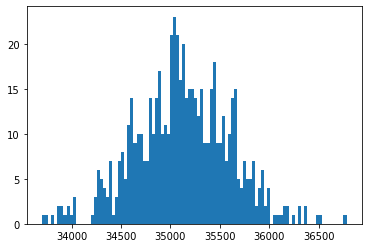

In [ ]:
# Histogram of 100 bins of row sums and distribution counts

df_sum = clean_df2.sum(axis=1)
plt.hist(df_sum, bins=100)

In [ ]:
# from the above histogram we decide to remove rows with sum <34200 or >36000 and see the shape of dataframe

print(clean_df2.shape)
clean_df3 = clean_df2.loc[df_sum>34200]
print(clean_df3.shape)
clean_df3 = clean_df3.loc[df_sum<36000]
print(clean_df3.shape)

(600, 3571)
(586, 3571)
(571, 3571)


**Finally check if the classes ratio is affected by removal of outlier rows**

In [ ]:
# combine clean_df3 with target after removal of outlier rows from target
clean_target = target_df.loc[clean_df3.index]
clean_df3 = pd.concat([clean_df3,clean_target], axis=1)
clean_df3.shape

(571, 3572)

In [ ]:
# check the shape of each class number of rows

clean_df3_0 = clean_df3[clean_df3['class'] == 0]
clean_df3_1 = clean_df3[clean_df3['class'] == 1]
print(clean_df3_0.shape)
print(clean_df3_1.shape)

(356, 3572)
(215, 3572)


### >>> note: ratio of each class is not affected by removal of outlier rows



## At this point we removed a total of: 
###### 50(all null col) + 72(duplicate col) + 2(all zeros col) + 350 (>=25% of gene elements null) + 4 (mixed null& zeros) + 571 (low count genes) + 380 (extreme outliers)= 1429 genes out of 5000 genes
###### 29 outlier samples were from 600 so the remaining samples are = 571

#### so our dataframe now had 571 rows and 3571 columns 

> ## Preprocessing steps:
>#### 11- Replacing missing values

In [ ]:
# replace null values in class 0 by mean of each column

for column in clean_df3_0.columns:
    col_mean = clean_df3_0[column].mean()
    clean_df3_0[column].fillna(col_mean,inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# replace null values in class 1 by mean of each column

for column in clean_df3_1.columns:
    col_mean = clean_df3_1[column].mean()
    clean_df3_1[column].fillna(col_mean,inplace= True)

In [ ]:
# check that all null values were replaced 

print (clean_df3_0.isnull().sum().sum())
print (clean_df3_1.isnull().sum().sum())

0
0


In [ ]:
# finally combine the two classes dataframes

clean_df3 = pd.concat([clean_df3_0,clean_df3_1],axis=0)
clean_df3.shape

(571, 3572)

> ## Preprocessing steps:
> #### 12- Check correlation between columns and remove highly correlated columns 

In [ ]:
X = clean_df3.iloc[:,:-1]
y = clean_df3.iloc[:, -1]

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# check correlated genes with threshold corr >= 0.7
corr_features = correlation(X, 0.7)
len(set(corr_features))

37

In [ ]:
corr_features

{'gene_128',
 'gene_1553',
 'gene_1702',
 'gene_1947',
 'gene_2160',
 'gene_2352',
 'gene_2373',
 'gene_2380',
 'gene_253',
 'gene_2734',
 'gene_2807',
 'gene_2864',
 'gene_2919',
 'gene_2949',
 'gene_3070',
 'gene_3234',
 'gene_3248',
 'gene_3314',
 'gene_3466',
 'gene_3531',
 'gene_3914',
 'gene_3961',
 'gene_3972',
 'gene_3986',
 'gene_4022',
 'gene_4087',
 'gene_4167',
 'gene_4396',
 'gene_4440',
 'gene_4503',
 'gene_4721',
 'gene_4734',
 'gene_4737',
 'gene_4738',
 'gene_4749',
 'gene_4883',
 'gene_4902'}

In [ ]:
# drop all correlated genes

X = X.drop(corr_features,axis=1)
print(X.shape)

(571, 3534)


## At this point we removed a total of: 
###### 50(all null col) + 72(duplicate col) + 2(all zeros col) + 350 (>=25% of gene elements null) + 4 (mixed null& zeros) + 571 (low count genes) + 380 (extreme outliers) + 37 (correlated genes) = 1466 genes out of 5000 genes
###### 29 outlier samples were from 600 so the remaining samples are = 571

#### so our dataframe now had 571 rows and 3534 columns 

> ## Preprocessing steps:
> #### 12- Feature scaling 

We will use feature scalling by log2 transformation

In [ ]:
#log transformation
for col in X.columns:
    X[col] = X[col].apply(lambda x: np.log2(x + 1))

> ## 5- Task 2: Classifier and Quality Measure Selection

a) Select at least two classifiers to solve the classification task at hand. Motivate the choice of your classifiers (e.g. complexity, performance, interpretability). 


b) Select at least two quality measures to evaluate model performance and justify your choice (Lectures 6 and 8).



**Steps :**


**1.**   **We chose three classifier models: k neighbors, decision tree and support vector machines as our train data are small ensembles models are not suitable to avoid overfit**

**2.**   **Apply fitting of the three models using 3 Kfold cross validation to use more data in training as our data is small**

**3.**   **Use 5 evaluation quality metrics for comparision between the three models
and choose the best two of them**




In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score, average_precision_score, matthews_corrcoef

# three model variables with middle parameters as possible
clf_A = KNeighborsClassifier(n_neighbors=10)
clf_B = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, random_state=42)
clf_C = SVC()

# use of 5 quality metrics to be used in k fold cross validation
scoring = {'acc' : make_scorer(accuracy_score),
           'f1' : make_scorer(f1_score), 
           'roc_auc' : make_scorer(roc_auc_score),
           'PR_auc' : make_scorer(average_precision_score),
           'matcf': make_scorer(matthews_corrcoef)}

# loop through the three models and fit all X, y and evaluate the model using 5 kfold cross validation
# and store each type of score range in a list then store total scores for each model in a dictionary
score = {}
results = {}
for clf in [clf_A, clf_B, clf_C]:
  kfold = StratifiedKFold(n_splits = 3, shuffle=True)
  score = model_selection.cross_validate(clf, X, y, cv = kfold, scoring = scoring)
  clf_name = clf.__class__.__name__
  results[clf_name] = score

In [ ]:
# see the score results for the three models
results

{'KNeighborsClassifier': {'fit_time': array([0.03578901, 0.05303907, 0.05237055]),
  'score_time': array([0.0614543 , 0.08193994, 0.08516216]),
  'test_acc': array([0.86910995, 0.91578947, 0.88947368]),
  'test_f1': array([0.79338843, 0.88405797, 0.832     ]),
  'test_roc_auc': array([0.82913165, 0.90436738, 0.85687382]),
  'test_PR_auc': array([0.77871567, 0.83484726, 0.81385855]),
  'test_matcf': array([0.73046122, 0.81887726, 0.77206475])},
 'DecisionTreeClassifier': {'fit_time': array([0.578686  , 0.44010925, 0.59289503]),
  'score_time': array([0.03031445, 0.03049064, 0.03155184]),
  'test_acc': array([0.91623037, 0.91578947, 0.88421053]),
  'test_f1': array([0.88732394, 0.88732394, 0.84722222]),
  'test_roc_auc': array([0.90808824, 0.91004853, 0.87700094]),
  'test_PR_auc': array([0.83462042, 0.82944904, 0.77568023]),
  'test_matcf': array([0.82088457, 0.82009705, 0.75400188])},
 'SVC': {'fit_time': array([0.24790859, 0.2499311 , 0.25441289]),
  'score_time': array([0.227844  , 0

In [ ]:
# loop through result dictionary and store the mean for each score for all three models
for model, test in results.items():
  for (k1,v1)in test.items():
    if 'time' in k1:
      test[k1] = round(v1.max(), 2)
    else:
      test[k1] = round(v1.mean(), 2)

In [ ]:
results

{'KNeighborsClassifier': {'fit_time': 0.06,
  'score_time': 0.08,
  'test_acc': 0.91,
  'test_f1': 0.87,
  'test_roc_auc': 0.89,
  'test_PR_auc': 0.85,
  'test_matcf': 0.82},
 'DecisionTreeClassifier': {'fit_time': 0.97,
  'score_time': 0.03,
  'test_acc': 0.92,
  'test_f1': 0.89,
  'test_roc_auc': 0.91,
  'test_PR_auc': 0.84,
  'test_matcf': 0.83},
 'SVC': {'fit_time': 0.36,
  'score_time': 0.17,
  'test_acc': 0.96,
  'test_f1': 0.94,
  'test_roc_auc': 0.94,
  'test_PR_auc': 0.93,
  'test_matcf': 0.91}}

### >>>From the above quality evaluation scores, we will chose decision tree and svm classifiers. we depended on percision recall score in our evaluation as our data is not balanced ~ 62% for class 0 and ~ 38% for class 1

> ## 6- Task 3: Parameter Tuning and Validation

a) Carefully choose the set of parameters of the selected classifiers.

b) Decide for a validation strategy (e.g. Hold-out, Cross Validation, Monte Carlo Validation, see Lecture 8), carefully select the ratios between training and validation, number of folds, or percentage of data  (e.g. 7:3, 8:2, 9:1) and justify your decision.

c) Use the validation strategy to evaluate the chosen range of parameters. Create a plot depicting the relation between parameter range and quality measures. Use the plot to find the optimal set of parameters for each method. Discuss what the best parameters are and how these were chosen.

d) Plot a ROC curve for the best performing models


**Steps :**


**1.**  **First we can't use hold out strategy as our data is small so it is not good to split it. secondly, Using Kfold CV only will end with high varaince and using MCCV only is not good for this small data as it leads to high bias.
Finally, to avoid high bias and high variance we used Kfold with MCCV we made this combination by using RepeatedStratifiedKFold method from sklearn that repeats the splits randomly in each iteration (so, we used 10 loops of 3 Kfold splits with total 30 splits)** 

**2.**   **Apply hyperparameter tunning for decision tree and svm models using three scores of accuracy, PR AUC and ROC AUC.**

**3.**   **Plotting of each parameters combination with the mean score from cross validation of 3 scores; accuracy, PR AUC and ROC AUC for each model to get the best parameters and at the end plot ROC curve for each model with best parameters**

**4.**   **Compare the variance of the best parameters combinations for each model using 30 score for each split** 

**5.**   **Select the model with high score in best parameters, high roc curve AUC and low variance** 


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

# decision tree hyper parameters
max_depth= [2, 3, 5, 10, 20]
min_samples_leaf= [2, 5, 10, 20]
criterion = ["gini", "entropy"]

# scoring metrics
scoring = {'acc' : make_scorer(accuracy_score),
           'PR_auc' : make_scorer(average_precision_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# loop through the three models and fit all X, y and evaluate the model using 5 kfold cross validation
# and store each type of score range in a list then store total scores for each model in a dictionary
cv= RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=1)

# dt parameter hypertunning and using cross validation
dt_scores = {}
for d in max_depth:
  for s in min_samples_leaf:
    for c in criterion:
      model= DecisionTreeClassifier(criterion=c, max_depth=d, min_samples_leaf=s, random_state=42)
      score = model_selection.cross_validate(model, X, y, cv = cv, scoring = scoring)
      dt_scores[str(d) + '/'+ str(s)+'/' + str(c)]=score
dt_scores

{'2/2/gini': {'fit_time': array([0.30151892, 0.30114412, 0.30948162, 0.29826951, 0.29759073,
         0.30227256, 0.30012274, 0.30335069, 0.308074  , 0.30478191,
         0.29811096, 0.31203318, 0.2999897 , 0.29751444, 0.30169916,
         0.29708171, 0.3016963 , 0.29863715, 0.30878639, 0.30010104,
         0.29775333, 0.30291772, 0.2978332 , 0.29845524, 0.30244088,
         0.29703355, 0.29729939, 0.30145526, 0.30019832, 0.29760385]),
  'score_time': array([0.02907658, 0.02837062, 0.02830458, 0.02892041, 0.03056765,
         0.02997661, 0.03145051, 0.02880311, 0.02865958, 0.02891016,
         0.02841282, 0.03200126, 0.02861881, 0.02885175, 0.03794813,
         0.02882981, 0.02874708, 0.02843571, 0.02882671, 0.02863169,
         0.02864504, 0.0285089 , 0.02872825, 0.02886176, 0.03074741,
         0.02838349, 0.02903366, 0.03135967, 0.03097653, 0.02890849]),
  'test_acc': array([0.90052356, 0.93157895, 0.87894737, 0.91099476, 0.91578947,
         0.91052632, 0.91099476, 0.92631579, 0.88

In [121]:
# loop through result dictionary and store the mean for each score and store the parameter range

dt_param = []
prauc_dt =[]
acc_dt =[]
rocauc_dt =[]
total_dt= {}
for p, s in dt_scores.items():
  scores=[]
  for (k, v)in s.items():
    if 'time' in k:
      continue
    elif 'PR_auc'in k:
      prauc_dt.append(round(v.mean(), 2))
      scores.append(v)
    elif 'roc_auc'in k:
      rocauc_dt.append(round(v.mean(), 2))
    elif 'acc'in k:
      acc_dt.append(round(v.mean(), 2))
      dt_param.append(p)
  total_dt[p]=scores

#print(total_dt)
print(len(dt_param))
print(len(prauc_dt))
print(len(acc_dt))
print(len(rocauc_dt))

40
40
40
40


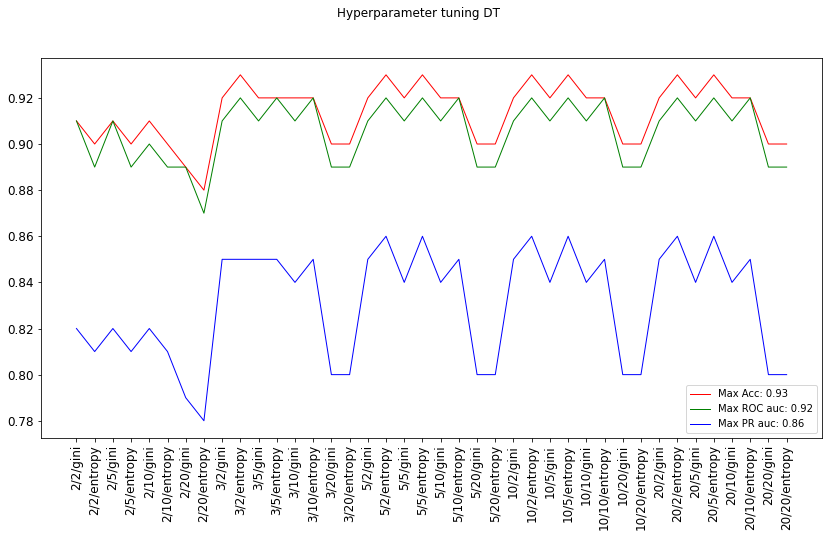

In [ ]:
# plot the parameter range with 3 types of scores of decision tree model

fig = plt.figure(figsize =(14, 7))
fig.suptitle('Hyperparameter tuning DT')
ax = fig.add_subplot()
bp = plt.plot(dt_param, acc_dt, color='red', label='Max Acc: '+str(max(acc_dt)), lw=1)
bp = plt.plot(dt_param, rocauc_dt, color='green', label='Max ROC auc: '+str(max(rocauc_dt)), lw=1)
bp = plt.plot(dt_param, prauc_dt, color='blue', label='Max PR auc: '+str(max(prauc_dt)), lw=1)
ax.set_xticklabels(dt_param)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(loc=4, prop={'size': 10})
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

C= [0.1, 1, 3]
gamma= ['scale', 'auto']
kernel= ['rbf', 'linear', 'poly']

svm = SVC()
scoring = {'acc' : make_scorer(accuracy_score),
           'PR_auc' : make_scorer(average_precision_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# loop through the three models and fit all X, y and evaluate the model using 5 kfold cross validation
# and store each type of score range in a list then store total scores for each model in a dictionary
cv= RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=1)

svm_scores = {}
for c in C:
  for g in gamma:
    for k in kernel:
      model= SVC(C=c, gamma=g, kernel=k)
      score = model_selection.cross_validate(model, X, y, cv = cv, scoring = scoring)
      svm_scores[str(k) + '/'+ str(c)+'/' + str(g)]=score
svm_scores

{'rbf/0.1/scale': {'fit_time': array([0.52968764, 0.23855591, 0.24239612, 0.23810935, 0.24931669,
         0.26494336, 0.24865341, 0.25072289, 0.23863339, 0.24069548,
         0.24425459, 0.25186872, 0.24117041, 0.24046826, 0.24709773,
         0.24856138, 0.24243879, 0.23724389, 0.24635029, 0.24381828,
         0.24685764, 0.24609804, 0.2488873 , 0.23992181, 0.23750901,
         0.24010038, 0.24427247, 0.24042249, 0.23872948, 0.2467258 ]),
  'score_time': array([0.2244482 , 0.220263  , 0.22313666, 0.21645665, 0.22638583,
         0.21747518, 0.21773505, 0.2211647 , 0.21410704, 0.2222774 ,
         0.215446  , 0.22225595, 0.21903777, 0.22710252, 0.21694899,
         0.22554803, 0.21586084, 0.21306539, 0.21152806, 0.21728778,
         0.21768904, 0.21404624, 0.22555375, 0.21135306, 0.22303748,
         0.21726322, 0.22700739, 0.23698545, 0.21800184, 0.22044492]),
  'test_acc': array([0.62303665, 0.62631579, 0.62105263, 0.62303665, 0.62631579,
         0.62105263, 0.62303665, 0.62631579,

In [118]:
# loop through result dictionary and store the mean for each score and parameter range 

svm_param = []
prauc_svm =[]
acc_svm =[]
rocauc_svm =[]
total_svm= {}
for p, s in svm_scores.items():
  scores=[]
  for (k, v)in s.items():
    if 'time' in k:
      continue
    elif 'PR_auc'in k:
      prauc_svm.append(round(v.mean(), 2))
      scores.append(v)
    elif 'roc_auc'in k:
      rocauc_svm.append(round(v.mean(), 2))
    elif 'acc'in k:
      acc_svm.append(round(v.mean(), 2))
      svm_param.append(p)
  total_svm[p]=scores

#print(total_svm)
print(len(svm_param))
print(len(prauc_svm))
print(len(acc_svm))
print(len(rocauc_svm))

18
18
18
18


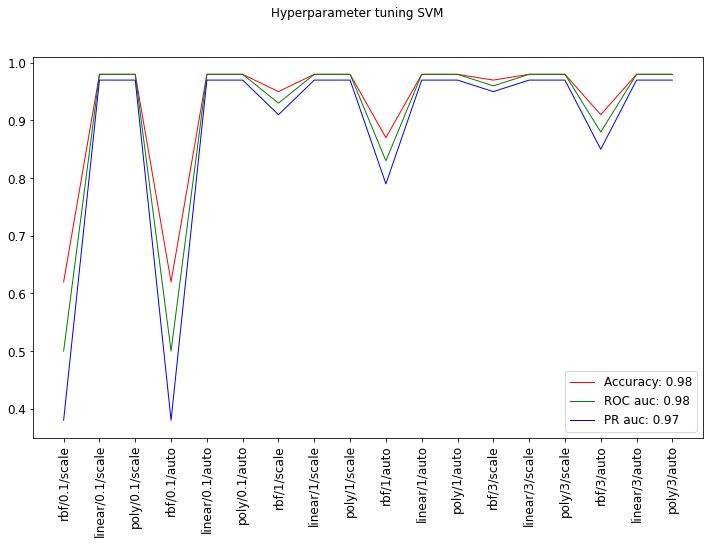

In [119]:
# plot the parameter range with 3 types of scores of decision tree model

fig = plt.figure(figsize =(12, 7))
fig.suptitle('Hyperparameter tuning SVM')
ax = fig.add_subplot()
bp = plt.plot(svm_param, acc_svm, color='red', label='Accuracy: '+str(max(acc_svm)), lw=1)
bp = plt.plot(svm_param, rocauc_svm, color='green', label='ROC auc: '+str(max(acc_svm)), lw=1)
bp = plt.plot(svm_param, prauc_svm, color='blue', label='PR auc: '+str(max(prauc_svm)), lw=1)
ax.set_xticklabels(svm_param)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(loc=4, prop={'size': 12})
plt.show()

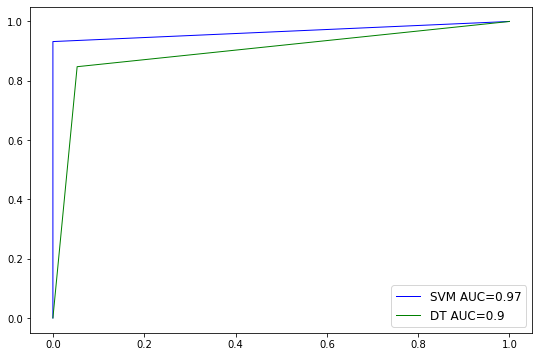

In [ ]:
from sklearn.metrics import roc_curve

# split the data into train and test 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# SVM and DT models with the best parameters
SVM = SVC(C= 0.1, gamma='scale', kernel= 'linear', probability=True)
DT= DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf=5, random_state=42)

# model fit on train data
SVM.fit(x_train, y_train)
DT.fit(x_train, y_train)

# prediction of the model
pred_svm = SVM.predict(x_test)
pred_dt = DT.predict(x_test)

# calculate roc auc for each model
AUC0 = roc_auc_score(y_test, pred_svm)
AUC1 = roc_auc_score(y_test, pred_dt)

# get false and true predictions for each model
fpr0, tpr0, thresholds0 = roc_curve(y_test, pred_svm)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_dt)

# plot roc auc with calculated AUC values
plt.figure(figsize=(9, 6))
plt.plot(fpr0,tpr0, color='blue', label="SVM AUC="+str(round(AUC0, 2)), lw=1)
plt.plot(fpr1,tpr1, color='green', label="DT AUC="+str(round(AUC1, 2)), lw=1)

plt.legend(loc=4, prop={'size': 12})

plt.show()

In [123]:
# print mean and variance of pr auc score for decision tree model best parameters
for p, s in total_dt.items():
  if p == '5/5/entropy':
    print('DT: ', p, ': Mean(PR_AUC): ', round(np.mean(s),2), ', Var(PR_AUC): ', round(np.var(s),4))
    print('=================================')

# print mean and variance of pr auc score for svm model best parameters
for p, s in total_svm.items():
  if p == 'linear/0.1/scale':
    print('SVM:', p, ': Mean( PR_AUC): ', round(np.mean(s),2), ', Var(PR_AUC): ', round(np.var(s),4))


DT:  5/5/entropy : Mean(PR_AUC):  0.86 , Var(PR_AUC):  0.0019
SVM: linear/0.1/scale : Mean( PR_AUC):  0.97 , Var(PR_AUC):  0.0002



# >> Final Evaluation:

### 1- SVM model is better than DT model in PR AUC score after tunning and in ROC curve auc score, and also SVM has low variance than DT.

### 2- linear and poly kernels are the same in performance. C=0.1, gamma = scale are the best parameters in SVM model. So, we will choose linear kernel for simplicity awith the best parameters


> ## 7- Task 4: Model Training

a) Select one classifier/ model that is most generalizable and will perform best on the external test set.

b) With chosen classifiers and optimal parameters, train your model with data (training data).


In [ ]:
# initiation of the linear svm model with the best parameters

SVM_clf = SVC(C=0.1, kernel='linear', gamma='scale', probability=True)

# fit the model on the training data
SVM_clf.fit(X, y)


SVC(C=0.1, kernel='linear', probability=True)

> ## 8- Task 5: Model interpretation and feature importance

a) Depending on your choice of model, select an adequate feature importance method (e.g. Linear weights, Gini Index, forward/backward selection, see Lecture 9) and explain your decision.

b) Identify the 10 most informative features for your model and visualize them in a bar plot sorted by their importance.


**Steps:**

**1- Use linear weights calculated by the linear model of svm to see the feature importance and plot the top 10 features.**

**2- Use pearson correlation as another way to see the feature importance and plot the top 10 features**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[['gene_663', 0.017988165625706598], ['gene_830', 0.018506129347137627], ['gene_2197', 0.01911221230527318], ['gene_1957', 0.020328776057154763], ['gene_1870', 0.021338074557628314], ['gene_2715', 0.021999531698826465], ['gene_2156', 0.022911140594685], ['gene_3504', 0.023370753661159288], ['gene_4170', 0.024951527287982972], ['gene_81', 0.02578296492001634]]


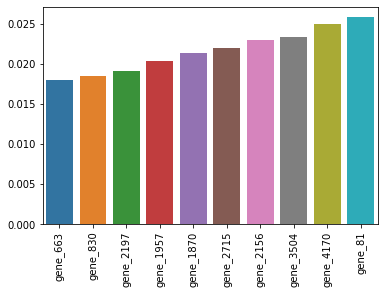

In [ ]:
import seaborn as sns

# train features
features = X.columns

# weights of the features from model coeficients attribute
coef = SVM_clf.coef_[0]

#map each feature with its importance score
f_coef = []
for f, c in zip(features, coef):
  f_coef.append([f, c])

# sort the list of feature weights and get the higher 10 features
top = sorted(f_coef, key = lambda x : x[1])[-10:]

# loop through top list and store the feature and weights in lists
top_col = []
top_cor = []
for i in top:
  top_col.append(i[1])
  top_cor.append(i[0])

# plot top 10 features with the weights
g = sns.barplot(top_cor, top_col)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

print(top)

[['gene_4205', 0.5484403275406937], ['gene_2156', 0.5615372339958666], ['gene_620', 0.5635757428711092], ['gene_97', 0.5959474507946684], ['gene_663', 0.6084035764093698], ['gene_92', 0.6114787203277329], ['gene_4170', 0.6410999487517671], ['gene_3504', 0.6488060491690759], ['gene_1042', 0.6722531062218413], ['gene_1798', 0.6994299704980662]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


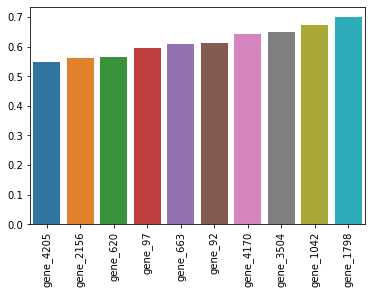

In [140]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# store the correlation coeficients with each feature in a list
pvs = []
for i in X.columns:
  r = stats.pearsonr(X[i], y)
  pvs.append([i, r[0]])

# sort the list according to weights and get the higher 10 
top = sorted(pvs, key = lambda x : x[1])[-10:]

# store the name of column and coeficients in lists
top_col = []
top_cor = []
top = sorted(pvs, key = lambda x : x[1])[-10:]
for i in top:
  top_col.append(i[1])
  top_cor.append(i[0])

# plot the columns with their importance
g = sns.barplot(top_cor, top_col)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

print(top)

> ## 9- Task 6: External Testing Code

a) Load external test dataset stored in the following two files: “testdata.csv” and “testlabels.csv”. Both will have the same format as the given dataset. At the time of testing, we will copy these into your collaborative file and run your test code.

b) Prepare code for your classifier to be applied to the loaded data and labels. Note: If you selected a set of features for your finale model, please make sure that you also reduce the test dataset to those features.

c) Store the predicted labels in a vector named “finaltest_pred” (see Exercise week 10).

d) Store the predicted probabilities in a vector named “finaltest_prob” (see Exercise week 10).


##  <u> Steps</u>:


**1.**   **load the test data and labels and convert them to dataframes**

**2**.   **Reduce columns of testdata with the same columns present in traindata**

**3.**   **Impute null values in testdata with the train column mean for each class (the same value used for imputing in traing data)**

**4.**   **log transformation for testdata using log2**

**5.**   **store final test data as finaltest**

**6.   make prediction of the model on finaltest and store the predicted labels as finaltest_pred and predicted probabilites as finatest_prob**





In [124]:
# convert testdata to dataframe and make Unnamed:0 column as index

testdata =pd.read_csv('testdata.csv', index_col='Unnamed: 0')

In [125]:
# convert testlabels to dataframe and make Unnamed:0 column as index

test_label = pd.read_csv('testlabels.csv', index_col='Unnamed: 0')

In [126]:
# rename the label column to class 

test_label.columns = ['class']

In [127]:
# discard the features that were discarded from train data 

test2= testdata.filter(X.columns)
test2.shape

(600, 3534)

In [128]:
# add the testlabel to the testdata dataframe

lab_test = pd.concat([test2,test_label],axis=1)

In [129]:
# split the testdata into class0 and class1 dataframes

test0=lab_test[lab_test['class']==0]
test1=lab_test[lab_test['class']==1]

In [130]:
# impute the null value in the testdata columns by the same value we used for imputing
# in the train data mean(train(col) of class 0

for col in test0.columns:
    train0_col_mean = clean_df3_0[col].mean()
    test0[col].fillna(train0_col_mean, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [131]:
# impute the null value in the testdata columns by the same value we used for imputing
# in the train data mean(train(col) of class 1

for col in test1.columns:
    train1_col_mean = clean_df3_1[col].mean()
    test1[col].fillna(train1_col_mean, inplace= True)

In [132]:
# combine the two class dataframes to each other after imputing of null values

comb_test = pd.concat([test0,test1],axis=0)

In [133]:
# store testing data without labels in finaltest dataframe

final_test = comb_test.iloc[:, :-1]

In [134]:
# log transformation of finaltest data

for col in final_test.columns:
 final_test[col] = final_test[col].apply(lambda x: np.log2(x + 1))

In [135]:
# Store the predicted labels as finaltest_pred

finaltest_pred = SVM_clf.predict(final_test)

In [138]:
# Store the predicted probabilities in finaltest_prob

finaltest_prob = SVM_clf.predict_proba(final_test)[:,1]

## Submission
Please submit your final collaborative file latest 12th of September to anne-christin.hauschild@med.uni-goettingen.de
